In [2]:
import pandas as pd

# Veri setinin yolu (senin dosya konumuna göre değiştir)
df = pd.read_csv("C:\\Users\\erdem\\AppData\\Roaming\\jupyter\\Salaries.csv")

# İlk 5 satırı göster
print(df.head())

   Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay OvertimePay   OtherPay Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.0  400184.25      NaN  567595.43         567595.43   
1  155966.02   245131.88  137811.38      NaN  538909.28         538909.28   
2  212739.13   106088.18    16452.6      NaN  335279.91         335279.91   
3    77916.0    56120.71   198306.9      NaN  332343.61         332343.61   
4   134401.6      9737.0  182234.59      NaN  326373.19         326373.19   

   Year  Notes         Agency Status  
0  2011    NaN  San Francisco    NaN  
1 

C:\Users\erdem\AppData\Local\Temp\ipykernel_26760\1326854054.py:4: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\erdem\\AppData\\Roaming\\jupyter\\Salaries.csv")


In [3]:
# Eksik değerlere bakalım
print(df.isnull().sum())

# TotalPayBenefits sütununda eksik yok mu kontrol 
print(df['TotalPayBenefits'].isnull().sum())

# Gerekli sütunları seçelim
df_model = df[['JobTitle', 'BasePay', 'OvertimePay', 'Benefits', 'TotalPayBenefits']]

# Eksik değerleri temizleyelim
df_model = df_model.dropna()

# Negatif veya sıfır maaşları çıkaralım 
df_model = df_model[df_model['TotalPayBenefits'] > 0]

# JobTitle sütununu one-hot encoding yapalım
df_model = pd.get_dummies(df_model, columns=['JobTitle'], drop_first=True)

print(df_model.head())
print(f"Veri seti boyutu: {df_model.shape}")

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64
0
         BasePay OvertimePay  Benefits  TotalPayBenefits  \
36159  128808.87   220909.48  44430.12         407274.78   
36160   302578.0         0.0  69810.19         391362.30   
36161   111921.0   146415.32  53102.29         389496.02   
36162  296943.01         0.0  72047.88         386807.48   
36163  126863.19   192424.49  44438.25         381643.11   

       JobTitle_ASR Senior Office Specialist  JobTitle_ASR-Office Assistant  \
36159                                  False                          False   
36160                                  False                          False   
36161                               

In [4]:
from sklearn.model_selection import train_test_split

X = df_model.drop('TotalPayBenefits', axis=1)
y = df_model['TotalPayBenefits']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim seti boyutu: {X_train.shape}")
print(f"Test seti boyutu: {X_test.shape}")

Eğitim seti boyutu: (89489, 1111)
Test seti boyutu: (22373, 1111)


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Model oluştur ve eğit
model = LinearRegression()
model.fit(X_train, y_train)

# Test setinde tahmin yap
y_pred = model.predict(X_test)

# Performans ölçümleri
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")

RMSE: 6731.79
R2 Score: 0.9894


In [6]:
from sklearn.preprocessing import StandardScaler

# Sayısal sütunları seçelim
num_cols = ['BasePay', 'OvertimePay', 'Benefits']

scaler = StandardScaler()

# Eğitim setindeki sayısal sütunları ölçeklendir
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Test setindeki sayısal sütunları aynı scaler ile dönüştür
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Modeli tekrar eğitelim
model = LinearRegression()
model.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Özellik ölçeklendirme sonrası RMSE: {rmse:.2f}")
print(f"Özellik ölçeklendirme sonrası R2 Score: {r2:.4f}")


Özellik ölçeklendirme sonrası RMSE: 6731.79
Özellik ölçeklendirme sonrası R2 Score: 0.9894


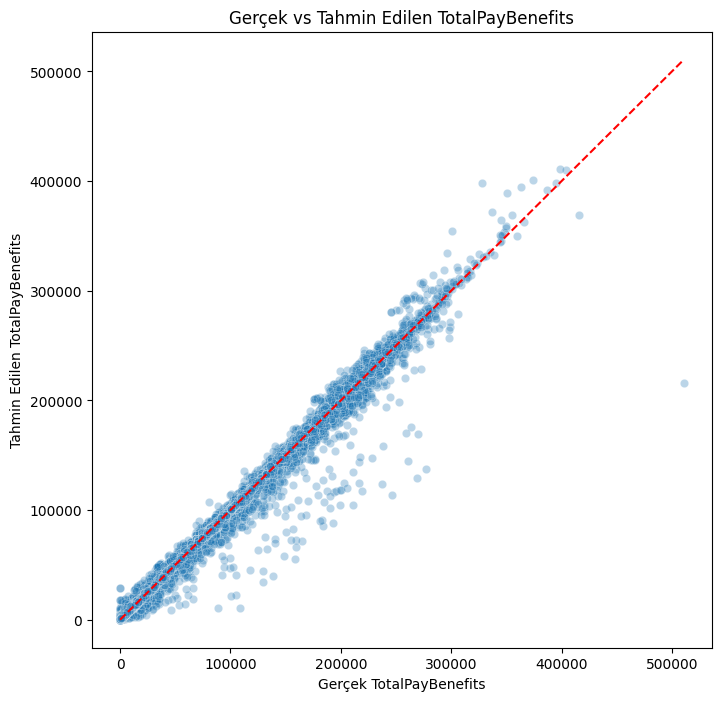

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.xlabel("Gerçek TotalPayBenefits")
plt.ylabel("Tahmin Edilen TotalPayBenefits")
plt.title("Gerçek vs Tahmin Edilen TotalPayBenefits")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

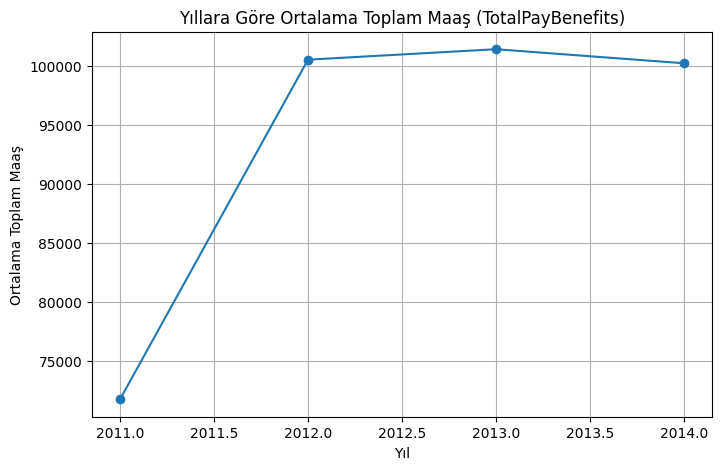

In [8]:
import matplotlib.pyplot as plt

df_year = df.groupby('Year')['TotalPayBenefits'].mean()

plt.figure(figsize=(8,5))
plt.plot(df_year.index, df_year.values, marker='o')
plt.title("Yıllara Göre Ortalama Toplam Maaş (TotalPayBenefits)")
plt.xlabel("Yıl")
plt.ylabel("Ortalama Toplam Maaş")
plt.grid(True)
plt.show()
#Yıllara göre ortalama maaş nasıl değişmiş?

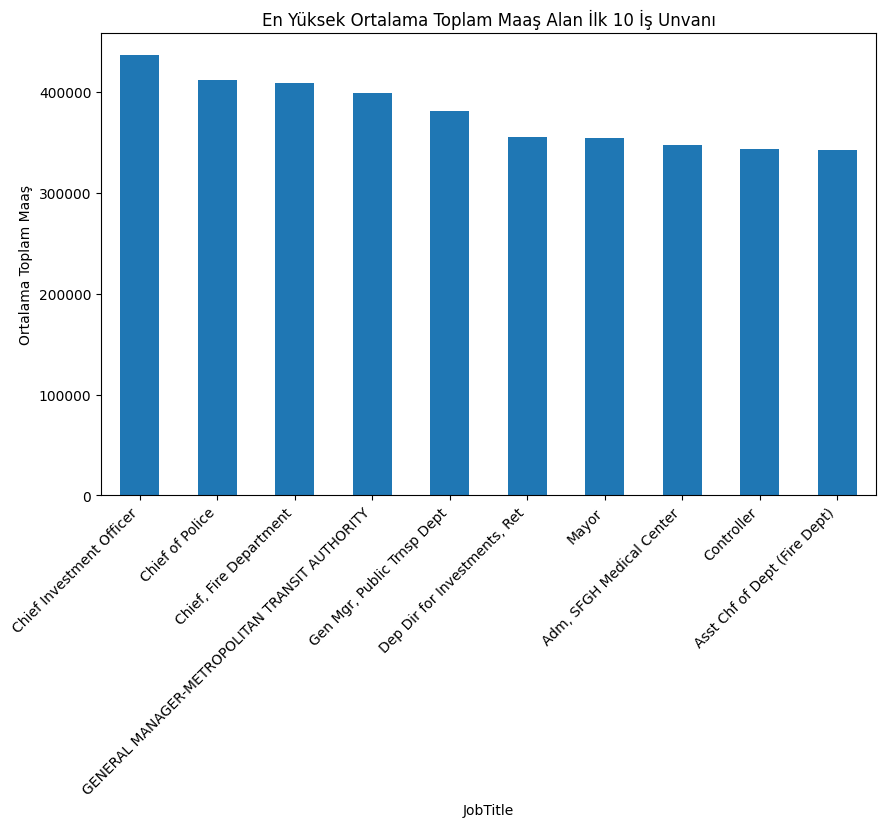

In [9]:
df_job = df.groupby('JobTitle')['TotalPayBenefits'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
df_job.plot(kind='bar')
plt.title("En Yüksek Ortalama Toplam Maaş Alan İlk 10 İş Unvanı")
plt.ylabel("Ortalama Toplam Maaş")
plt.xticks(rotation=45, ha='right')
plt.show()
#Ortalama maaşı en yüksek olan 10 iş 

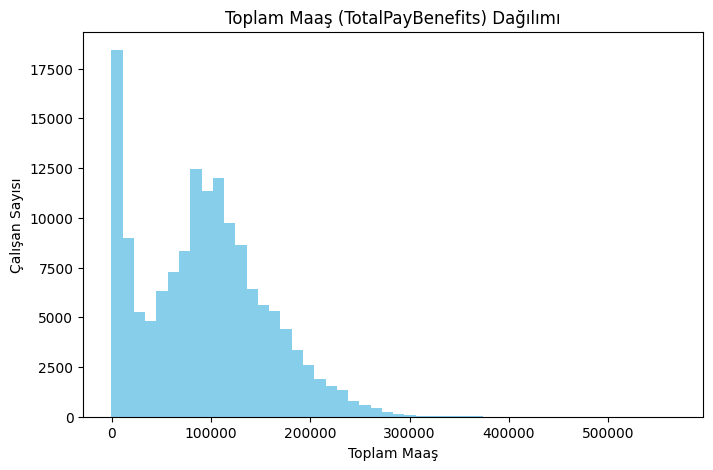

In [10]:
plt.figure(figsize=(8,5))
plt.hist(df['TotalPayBenefits'], bins=50, color='skyblue')
plt.title("Toplam Maaş (TotalPayBenefits) Dağılımı")
plt.xlabel("Toplam Maaş")
plt.ylabel("Çalışan Sayısı")
plt.show()
#Toplam maaşların genel dağılımı

In [11]:
import joblib

# Modeli kaydet
joblib.dump(model, 'sf_salaries_model.pkl')
print("Model başarıyla kaydedildi.")

Model başarıyla kaydedildi.
